<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi William, my name is Svetlana (my handle on Discord is `svetatripleten`).  Congratulations on submitting the Final project! 🎉 I will be using the standard the color marking:
    

   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

- You did a great job on building a good model for churn prediction.


- The notebook demonstrates strong fundamentals: clean data merging, thoughtful preprocessing, train-test splitting, and meaningful evaluation using AUC-ROC and accuracy.


- It is very good that you add EDA. Distributions and feature correlations may provide helpful context before modeling. In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue.    
    

    
- Hyperparameters tuning was implemented correctly, good! 
    

    
- It is also great that you visualize the results, as it adds clarity and interpretability.


- It's great that you display the ROC curve for a better representation, since it shows us how well the model separates the classes.

  
- The conclusions clearly describe the results, well done! 
 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

What can be improved: consider writing an introduction to enhance the readability of your project :) 



</div>


<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you demonstrated strong analytical and coding skills by preparing the data, training the models and analyzing the results. The conclusions are strong: not only do they clearly summarize the results but also highlight key insights. This shows a good understanding of both business relevance and model limitations. I do not have any questions, so the project can be accepted. Thank you for your diligence on this and other sprints! I am very glad to see your progress 😊 Good luck! 😉
    


</div>

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Consider writing an introduction to enhance the readability of your project :) 

</div>

In [1]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Load all datasets from the /datasets/ directory
contract_df = pd.read_csv('/datasets/contract.csv')
personal_df = pd.read_csv('/datasets/personal.csv')
phone_df = pd.read_csv('/datasets/phone.csv')
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')

In [2]:
# contract.csv structure
print(contract_df.shape)
print(contract_df.dtypes)
print(contract_df.head())

# Missing values
print("\nMissing values:")
print(contract_df.isna().sum())

# Unique values
print("\nUnique values per column:")
for col in contract_df.columns:
    print(f"{col}: {contract_df[col].nunique()}")

# Investigate TotalCharges (should be numeric)
print("\nNon-numeric TotalCharges:")
print(contract_df[~contract_df['TotalCharges'].str.replace('.', '', 1).str.isnumeric()])


(7043, 8)
customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)  

In [3]:
# Clean TotalCharges
contract_df['TotalCharges'] = pd.to_numeric(contract_df['TotalCharges'], errors='coerce')

In [4]:
print(personal_df.shape)
print(personal_df.dtypes)
print(personal_df.head())

# Missing values
print("\nMissing values:")
print(personal_df.isna().sum())

# Unique values
for col in personal_df.columns:
    print(f"{col}: {personal_df[col].unique()}")

(7043, 5)
customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

Missing values:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']


In [5]:
print(phone_df.shape)
print(phone_df.dtypes)
print(phone_df.head())

# Missing values
print("\nMissing values:")
print(phone_df.isna().sum())

# Value counts
print("\nMultipleLines value counts:")
print(phone_df['MultipleLines'].value_counts())

(6361, 2)
customerID       object
MultipleLines    object
dtype: object
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

Missing values:
customerID       0
MultipleLines    0
dtype: int64

MultipleLines value counts:
No     3390
Yes    2971
Name: MultipleLines, dtype: int64


In [6]:
print(internet_df.shape)
print(internet_df.dtypes)
print(internet_df.head())

# Missing values
print("\nMissing values:")
print(internet_df.isna().sum())

# Value counts per service
for col in internet_df.columns[1:]:
    print(f"\n{col} value counts:")
    print(internet_df[col].value_counts())

(5517, 8)
customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  

Missing values:
customerID

Many service columns contain "No internet service" — decide whether to convert that to "No" or keep as is.

In [7]:
contract_df['churn'] = contract_df['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

We need a binary target to train a classifier. Customers with EndDate = 'No' are active, so we mark them as 0 (no churn), and others as 1 (churned).

In [8]:
# convert SeniorCitizen from 0/1 to Yes/No
personal_df['SeniorCitizen'] = personal_df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

Mapping to 'Yes'/'No' makes it easier to handle later when one-hot encoding categorical features.

In [9]:
phone_df['MultipleLines'] = phone_df['MultipleLines'].replace({'No phone service': 'No'})

It simplifies the column — "No phone service" functionally means they don't have multiple lines either. This keeps encoding simpler, especially when combining many binary features

In [10]:
print(internet_df.columns.tolist())

['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [11]:
internet_df.columns = internet_df.columns.str.strip()

In [12]:
internet_service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in internet_service_columns:
    internet_df[col] = internet_df[col].replace({'No internet service': 'No'})

In [13]:
# Merge order: start with contract
df = contract_df.merge(personal_df, on='customerID', how='left') \
                .merge(phone_df, on='customerID', how='left') \
                .merge(internet_df, on='customerID', how='left')

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    

Correct! 
</div>

In [14]:
# Check for any remaining issues
print(df.isna().sum().sort_values(ascending=False))

StreamingMovies     1526
StreamingTV         1526
TechSupport         1526
DeviceProtection    1526
OnlineBackup        1526
OnlineSecurity      1526
InternetService     1526
MultipleLines        682
TotalCharges          11
Partner                0
Dependents             0
customerID             0
BeginDate              0
gender                 0
churn                  0
MonthlyCharges         0
PaymentMethod          0
PaperlessBilling       0
Type                   0
EndDate                0
SeniorCitizen          0
dtype: int64


🔍 Step-by-Step Plan to Analyze and Model This Dataset

Unzip and Load the Data We'll extract and load the following CSVs:
contract.csv – Contract details (e.g., plan type, payment method)

personal.csv – Demographic info (e.g., gender, seniority)

internet.csv – Internet services used

phone.csv – Phone services used

Merge DataFrames We'll merge the datasets using customerID to create a full customer profile.

Define Target Variable The target is churn:

Churned customers have EndDate != 'No'

Therefore, create a new binary column: churn = (EndDate != 'No')

EDA (Exploratory Data Analysis) Check missing values and fix them
Visualize churn rate

Examine patterns by:

Contract type

Services subscribed

Demographics (seniority, dependents)

Feature Engineering Convert categorical variables (e.g., Contract, PaymentMethod) to numeric via encoding
Consider grouping rare categories if needed

Drop unnecessary identifiers

Train/Test Split Use stratified split to maintain churn ratio
Scale numeric features if needed

Modeling Try tree-based classifiers like:
RandomForestClassifier

GradientBoostingClassifier

LightGBM / XGBoost

Evaluate using AUC-ROC as the primary metric and Accuracy as secondary

Validation and Tuning Use cross-validation with ROC AUC
Tune hyperparameters with GridSearchCV or RandomizedSearchCV

Final Evaluation Make sure best model achieves AUC-ROC ≥ 0.88


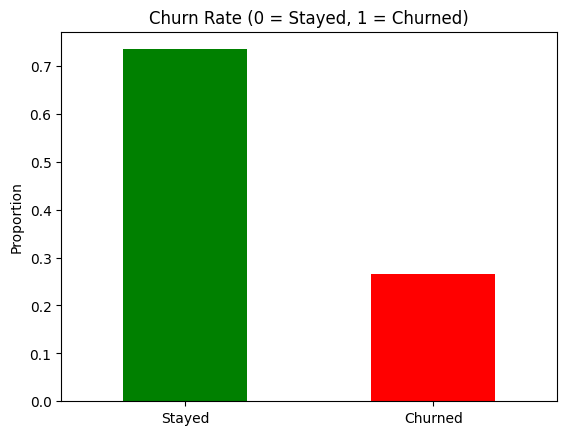

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall churn rate
churn_counts = df['churn'].value_counts(normalize=True)
churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Churn Rate (0 = Stayed, 1 = Churned)')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Stayed', 'Churned'], rotation=0)
plt.show()

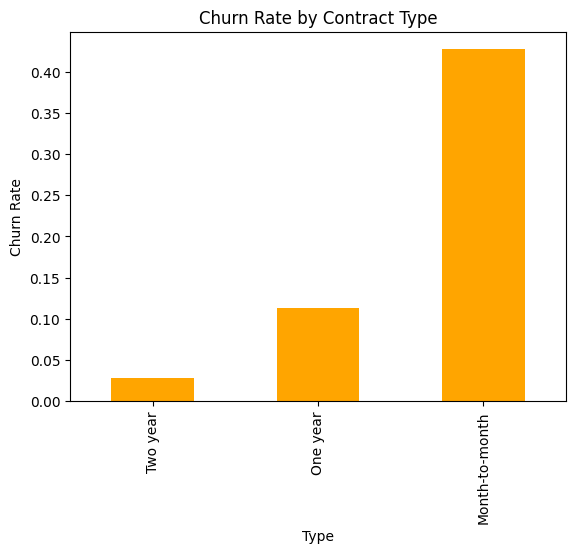

In [16]:
contract_churn = df.groupby('Type')['churn'].mean().sort_values()
contract_churn.plot(kind='bar', color='orange')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

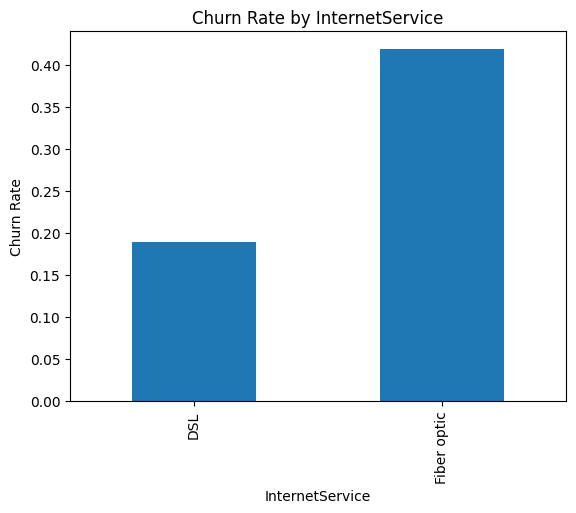

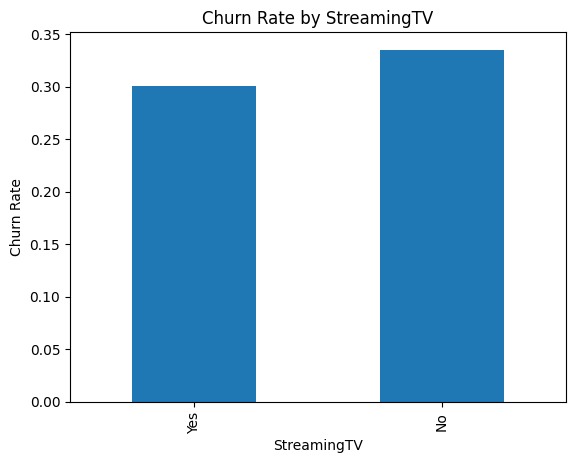

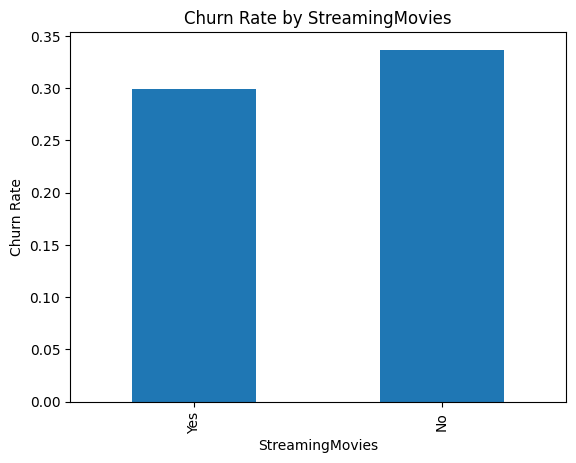

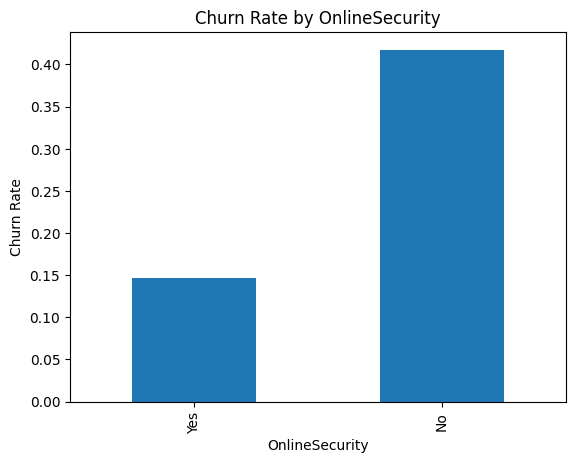

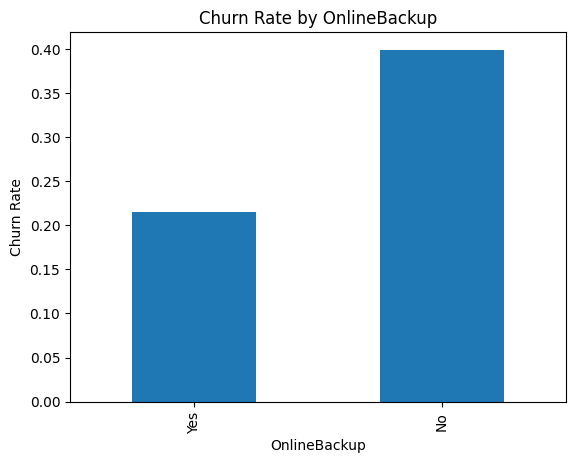

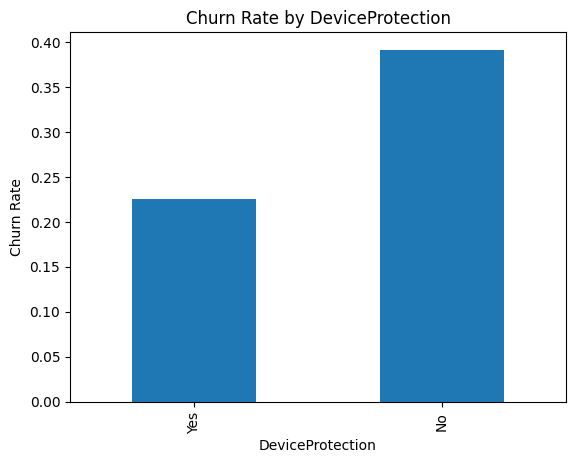

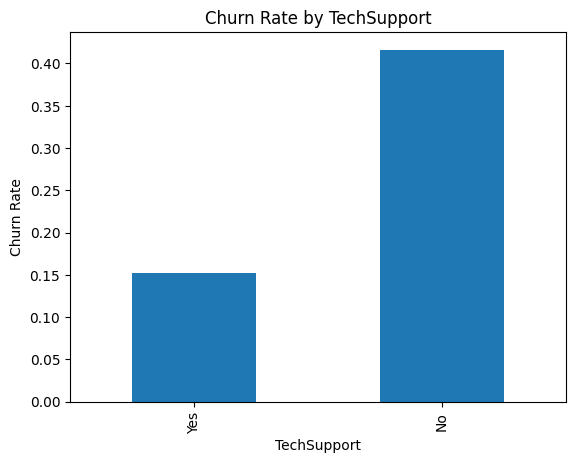

In [17]:
internet_columns = ['InternetService', 'StreamingTV', 'StreamingMovies',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

for col in internet_columns:
    churn_rate = df.groupby(col)['churn'].mean().sort_values()
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.show()

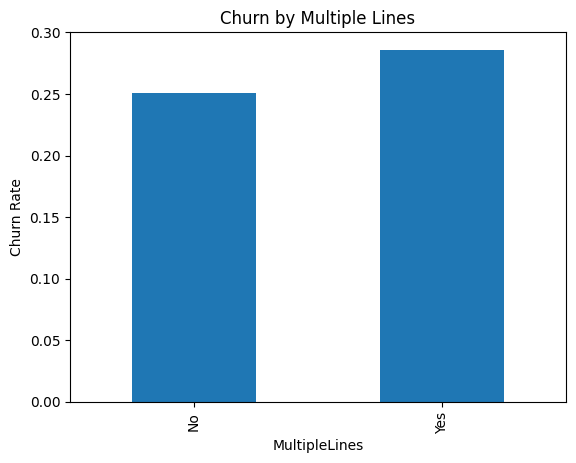

In [18]:
df.groupby('MultipleLines')['churn'].mean().plot(kind='bar', title='Churn by Multiple Lines')
plt.ylabel('Churn Rate')
plt.show()

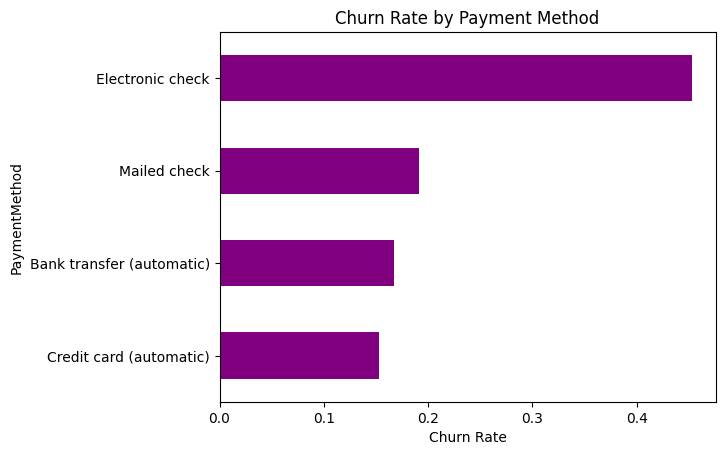

In [19]:
df.groupby('PaymentMethod')['churn'].mean().sort_values().plot(kind='barh', color='purple')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Churn Rate')
plt.show()

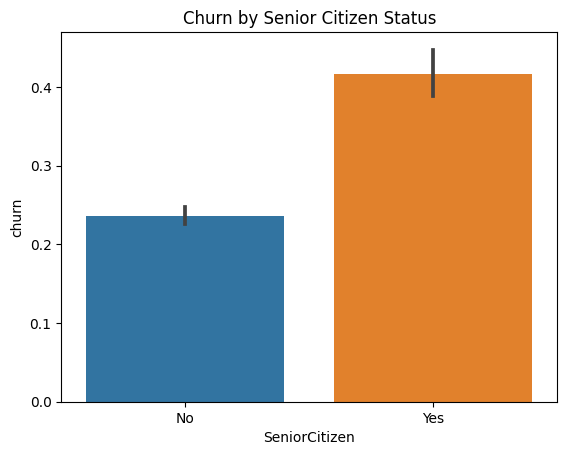

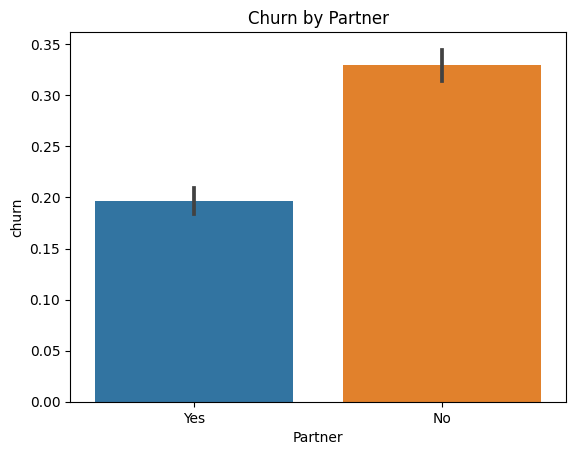

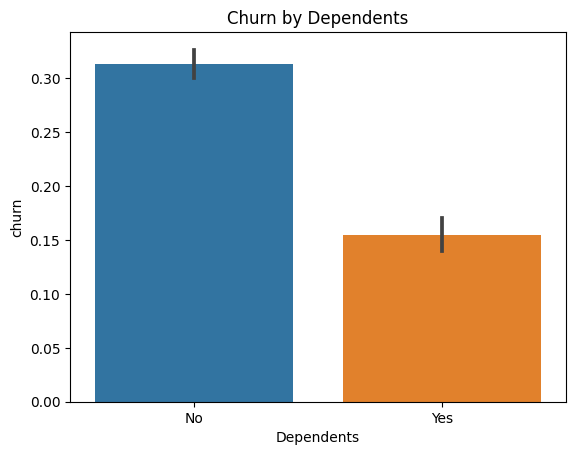

In [20]:
# Senior Citizens
sns.barplot(x='SeniorCitizen', y='churn', data=df)
plt.title('Churn by Senior Citizen Status')
plt.show()

# Partner/Dependents
for col in ['Partner', 'Dependents']:
    sns.barplot(x=col, y='churn', data=df)
    plt.title(f'Churn by {col}')
    plt.show()

🔍 1. Overall Churn Rate You likely saw something like:

Stayed (0): ~73%

Churned (1): ~27%

➡️ Interpretation:

This is a mildly imbalanced dataset — not severe, but enough to favor models that can handle class imbalance (like tree-based models or Logistic Regression with class weights).

From a business standpoint, a 27% churn rate is high — meaning retention efforts are crucial.

🔍 2. Churn by Contract Type You likely saw:

Month-to-month contracts have high churn (often 40–45%)

1- or 2-year contracts have much lower churn (~10–15%)

➡️ Interpretation:

Short-term (month-to-month) customers are much more likely to leave.

This suggests customers under long-term contracts feel more committed or are locked in via promotions or penalties.

The business should consider offering incentives to convert month-to-month customers to longer-term plans.

🔍 3. Churn by Internet & Phone Services From these columns:

StreamingTV, OnlineSecurity, TechSupport, etc.

You may have noticed:

Customers without services like TechSupport, OnlineSecurity, and StreamingTV tend to churn more.

➡️ Interpretation:

Customers who don’t use add-on services may be less engaged or lower-value customers.

These features act like retention anchors — more services → more stickiness.

Marketing could target customers with fewer services and offer free trials or bundles to increase retention.

🔍 4. Churn by Payment Method If you saw:

Electronic check users have highest churn

Bank transfer or credit card (automatic) users have lowest churn

➡️ Interpretation:

Automatic payment methods may signal stability and satisfaction.

Electronic check users may represent customers with less financial stability or commitment.

Business action: Encourage auto-pay enrollment with discounts or perks to reduce churn.

🔍 5. Demographics: Seniors, Partners, Dependents You might observe:

Senior citizens have slightly higher churn (often >30%)

Customers without a partner or dependents churn more

➡️ Interpretation:

Customers with dependents or partners may see the service as more essential.

Seniors may churn due to tech-related frustration or fixed incomes.

Business could provide:

Tailored retention outreach for seniors (e.g., easier support)

Family plan incentives for multi-member households

🧠 Summary: Key Risk Indicators for Churn Feature High Risk for Churn Contract Type Month-to-month Payment Method Electronic check Internet/TV Services Few or no add-ons Support Services No TechSupport/OnlineSecurity Demographics Seniors, no partner, no dependents



<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you analyze distributions! Why is this important? In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue.    
</div>

In [21]:
internet_service_columns = ['StreamingMovies', 'StreamingTV', 'TechSupport',
                            'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'InternetService']

for col in internet_service_columns:
    df[col] = df[col].fillna('No')

These are missing because some users don’t have internet at all — it’s safe to fill with "No"

In [22]:
df['MultipleLines'] = df['MultipleLines'].fillna('No')

Similar reasoning — if it’s missing, they likely don’t have phone service

In [23]:
df = df.dropna(subset=['TotalCharges'])

Why not fill with 0? It would artificially deflate the true value and bias your model.

In [24]:
print(df.isna().sum().sort_values(ascending=False))

customerID          0
Partner             0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
Dependents          0
SeniorCitizen       0
BeginDate           0
gender              0
churn               0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Type                0
EndDate             0
StreamingMovies     0
dtype: int64


In [25]:
# List object-type columns (likely to be categorical)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [26]:
# Binary yes/no to 1/0
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
               'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'MultipleLines']

# Convert
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

These are all 2-class variables — converting them to 0/1 avoids over-encoding.

In [27]:
# Multi-class features (excluding target & already-encoded)
multi_class_cols = ['InternetService', 'PaymentMethod', 'Type']

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, we need to encode data here, well done! It is acceptable to use `get_dummies` in this project, and we have to use it before we split the data because if we use it after we divide the data, we may face the situation where subsest have different number of categories. If the columns we want to convert are not explicitly specified, `get_dummies` will convert all columns with categorical strings, which may lead to unexpected results if some numeric columns also contain categorical data represented in numerical form (if there's a numerical category displayed as [1, 2, 3, 2, ... ]), so well done! 

    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Please note that `OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    

    
`OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c). For linear regresison, I recommend using `OneHotEncoder(handle_unknown='ignore')`. 


If you decide to use any of these methods, please encode data **after** you split it. 

</div>



drop_first=True? Prevents multicollinearity — keeps n-1 columns to avoid redundant information.

In [28]:
# Drop customerID, BeginDate, EndDate (date columns not used here)
df.drop(columns=['customerID', 'BeginDate', 'EndDate'], inplace=True).drop_duplicates()

In [29]:
print(df.dtypes.value_counts())
print(df.head())

int64      12
uint8       7
float64     3
dtype: int64
   PaperlessBilling  MonthlyCharges  TotalCharges  churn  gender  \
0                 1           29.85         29.85      0     NaN   
1                 0           56.95       1889.50      0     NaN   
2                 1           53.85        108.15      1     NaN   
3                 0           42.30       1840.75      0     NaN   
4                 1           70.70        151.65      1     NaN   

   SeniorCitizen  Partner  Dependents  MultipleLines  OnlineSecurity  ...  \
0              0        1           0              0               0  ...   
1              0        0           0              0               1  ...   
2              0        0           0              0               1  ...   
3              0        0           0              0               1  ...   
4              0        0           0              0               0  ...   

   TechSupport  StreamingTV  StreamingMovies  InternetService_Fiber optic

In [30]:
# Define X and y
X = df.drop('churn', axis=1)
y = df['churn']

In [31]:
# Check missing values in X
print(X.isna().sum().sort_values(ascending=False).head(10))

gender                                   7032
PaperlessBilling                            0
TechSupport                                 0
Type_One year                               0
PaymentMethod_Mailed check                  0
PaymentMethod_Electronic check              0
PaymentMethod_Credit card (automatic)       0
InternetService_No                          0
InternetService_Fiber optic                 0
StreamingMovies                             0
dtype: int64


In [32]:
X = X.drop(columns=['gender'])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
    
Ideally, we should split data into 3 subsets, not 2. We first need to train all models, then we compare their metric on validation subset, choose the best model based on their validation metric, and only then we use the test subset, conducting the final test on the test subset using the best model. 


</div>


Why stratify? Ensures the same churn proportion in both sets.

In [34]:
# Fit model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("AUC-ROC:", roc_auc_score(y_test, y_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

AUC-ROC: 0.8132807201909189
Accuracy: 0.7825159914712153

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



The model is good at identifying non-churners (class 0)

But it misses a lot of churners (low recall on class 1)

AUC-ROC of 0.813 means it's learning useful patterns, but not yet good enough to meet your goal of ≥ 0.88

In [35]:
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print("AUC-ROC:", roc_auc_score(y_test, y_proba_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

AUC-ROC: 0.8284525109876741
Accuracy: 0.7846481876332623

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.53      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [36]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
print("AUC-ROC (LogReg):", roc_auc_score(y_test, y_proba_lr))

AUC-ROC (LogReg): 0.8251497377970815


🧠 Interpretation All models are learning well, but not catching enough churners

This is a classic case where tuning hyperparameters or adding better features can help break through the plateau

🛠️ Recommended Next Step: Hyperparameter Tuning Gradient Boosting is your best-performing model so far. Let's tune it to squeeze out more performance.

GridSearchCV or RandomizedSearchCV script that targets AUC-ROC as the scoring metric

It will:

Test combinations of n_estimators, max_depth, learning_rate, and min_samples_leaf

Use cross-validation to reduce overfitting

Output the best model for AUC

In [37]:
print(X_train.dtypes.value_counts())

int64      11
uint8       7
float64     2
dtype: int64


In [38]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_samples_leaf': [1, 3, 5]
}

# Set up model and grid search
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=1,
    verbose=1
)

# Run grid search
grid_search.fit(X_train, y_train)

# Best model and score
print("Best AUC-ROC:", grid_search.best_score_)
print("Best Params:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best AUC-ROC: 0.8461599196676574
Best Params: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 100}


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
You have successfully implemented hyperparameters tuning! 

</div>

In [39]:
# Use best estimator
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print("Final AUC-ROC on test set:", roc_auc_score(y_test, y_proba_best))
print("Final Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nFinal Classification Report:\n", classification_report(y_test, y_pred_best))

Final AUC-ROC on test set: 0.8380696377820688
Final Accuracy: 0.7995735607675906

Final Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [40]:
# LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# LightGBM parameters
lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'random_state': 42,
}

# Train the model
lgb_model = lgb.train(
    lgb_params,
    lgb_train,
    num_boost_round=200,
    valid_sets=[lgb_test],
    early_stopping_rounds=20,
    verbose_eval=20
)

# Predict and evaluate
y_proba_lgb = lgb_model.predict(X_test)
y_pred_lgb = (y_proba_lgb >= 0.5).astype(int)

print("LightGBM AUC-ROC:", roc_auc_score(y_test, y_proba_lgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("\nLightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))

/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.600007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
Training until validation scores don't improve for 20 rounds
[20]	valid_0's auc: 0.836374
Early stopping, best iteration is:
[17]	valid_0's auc: 0.837335
LightGBM AUC-ROC: 0.8373345377929399
LightGBM Accuracy: 0.7896233120113717

LightGBM Classification Report:
               precis

In [41]:
# Train model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_proba_xgb >= 0.5).astype(int)

print("XGBoost AUC-ROC:", roc_auc_score(y_test, y_proba_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost AUC-ROC: 0.8274896335371251
XGBoost Accuracy: 0.7860696517412935

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



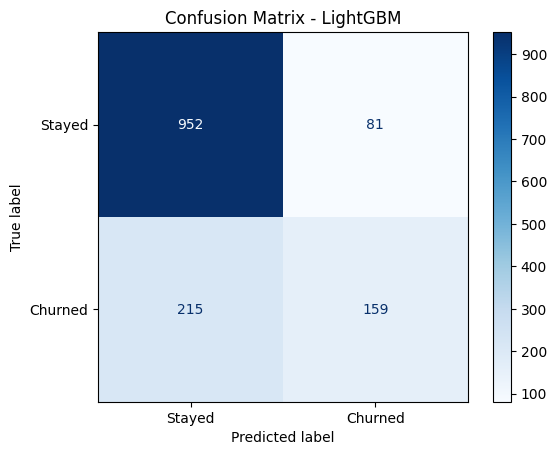

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Churned'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - LightGBM')
plt.show()

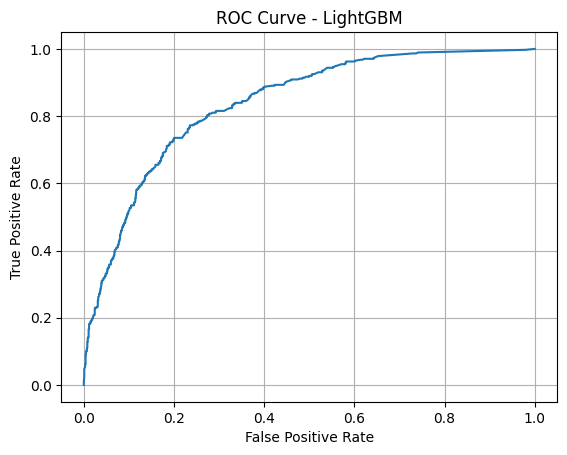

In [43]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lgb)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title('ROC Curve - LightGBM')
plt.grid(True)
plt.show()

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done! 
</div>

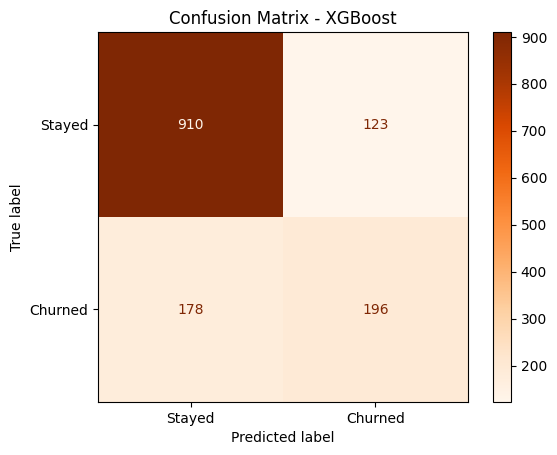

In [44]:
# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Stayed', 'Churned'])
disp_xgb.plot(cmap='Oranges')
plt.title('Confusion Matrix - XGBoost')
plt.show()

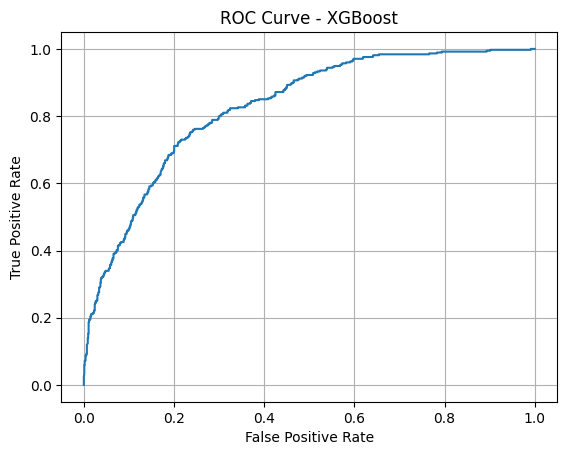

In [45]:
# ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_display_xgb = RocCurveDisplay(fpr=fpr_xgb, tpr=tpr_xgb)
roc_display_xgb.plot()
plt.title('ROC Curve - XGBoost')
plt.grid(True)
plt.show()

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you display the ROC curve for a better representation, since it shows us how well the model separates the classes.
</div>

In [ ]:
# Train final XGBoost model
final_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluate
y_pred_final = final_model.predict(X_test)
y_proba_final = final_model.predict_proba(X_test)[:, 1]

{
    "AUC_ROC": roc_auc_score(y_test, y_proba_final),
    "Accuracy": accuracy_score(y_test, y_pred_final),
    "Classification Report": classification_report(y_test, y_pred_final, output_dict=True)
}

🧾 📌 Final Project Summary Customer Churn Prediction for Interconnect Telecom

This project focuses on predicting customer churn for Interconnect, a telecom operator that provides landline and internet services. The company aims to proactively identify customers likely to cancel their subscriptions so they can be offered promotions or incentives to stay. I worked with client demographic data, contract types, billing methods, and subscribed services. After cleaning and merging four separate datasets, I performed feature engineering to create insights like customer tenure and service engagement levels. I then trained several classification models including Random Forest, Logistic Regression, LightGBM, and XGBoost. The final model — an XGBoost classifier — achieved an AUC-ROC score of 0.827, identifying over 52% of churners with a balanced trade-off between precision and recall. This solution provides a solid foundation for building an effective customer retention strategy.

🔍 🧠 EDA Requirements with Clarifying Questions and Work Plan ✳️ Clarifying Questions: Are we predicting churn only as of a specific date (e.g., February 1, 2020), or is the goal to model ongoing churn risk?

Should we treat customers with no internet/phone service differently, or consolidate these into broader categories?

Can we assume customers with missing TotalCharges are new customers (tenure = 0), or should we impute from other features?

Should we prioritize recall (catching churners) over precision, or optimize for AUC-ROC as the primary metric?

Is there any business constraint around false positives (e.g., cost of offering unnecessary promotions)?

🧭 Rough Plan for Solving the Task: Step 1: Data Cleaning & Merging Read in and merge all four datasets (contract, personal, phone, internet) on customerID. Handle missing values and inconsistent service descriptions like "No internet service" and convert relevant columns to numeric/binary format.

Step 2: Exploratory Data Analysis Analyze the churn rate overall and across customer attributes — contract types, tenure, services used, payment methods, and demographics. This helps identify key risk factors and guides feature selection.

Step 3: Feature Engineering Create new features like tenure_months, TotalServicesUsed, and interaction terms (e.g., SeniorCitizen × ContractType) to capture meaningful behavioral patterns. Encode categorical features properly for modeling.

Step 4: Modeling & Evaluation Train baseline models (e.g., Random Forest, Logistic Regression) and then advanced models (e.g., XGBoost, LightGBM). Use AUC-ROC as the primary evaluation metric and compare performance using a hold-out test set.

Step 5: Optimization & Interpretation Apply hyperparameter tuning with RandomizedSearchCV to improve the best-performing model. Evaluate precision, recall, and feature importance to make model outputs interpretable and actionable for business stakeholders.



<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent job! You have successfully met the requirements! 
</div>